In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

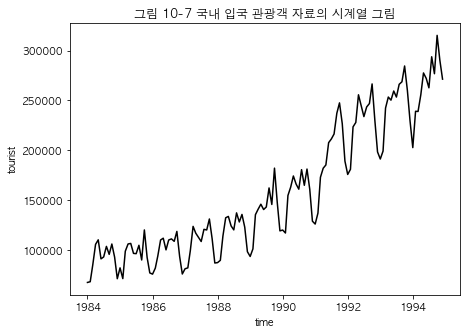

In [2]:
# Example 9.1
z = []

with open('../data/tourist.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
            
index = pd.date_range(start="1984", periods=len(z), freq="MS")
data = pd.Series(z, index)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black')
ax.set_xlabel("time")
ax.set_ylabel("tourist")
ax.set_title("그림 10-7 국내 입국 관광객 자료의 시계열 그림")
plt.show()

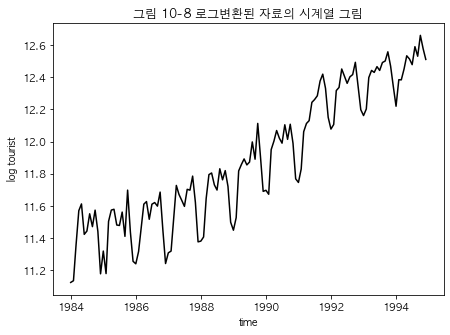

In [3]:
ltour = np.log(data)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(ltour, 'black')
ax.set_xlabel("time")
ax.set_ylabel("log tourist")
ax.set_title("그림 10-8 로그변환된 자료의 시계열 그림")
plt.show()

/Users/jonghyun/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


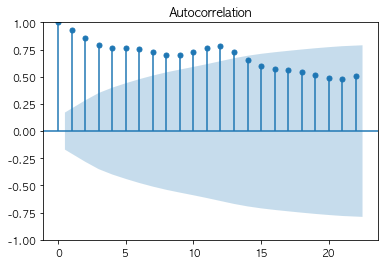

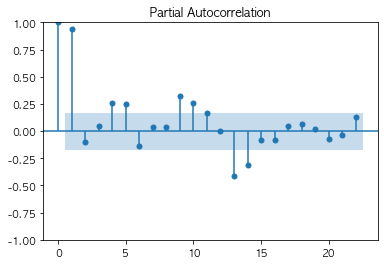

In [4]:
plot_acf(ltour)
plot_pacf(ltour)
plt.show()

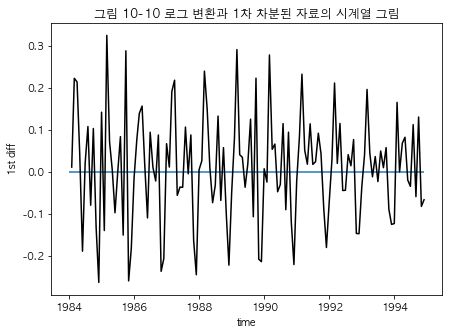

In [5]:
d1tour = ltour.diff(1)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(d1tour, 'black')
ax.set_xlabel("time")
ax.set_ylabel("1st diff")
ax.set_title("그림 10-10 로그 변환과 1차 차분된 자료의 시계열 그림")
ax.hlines(0, d1tour.index.min(), d1tour.index.max())
plt.show()

/Users/jonghyun/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


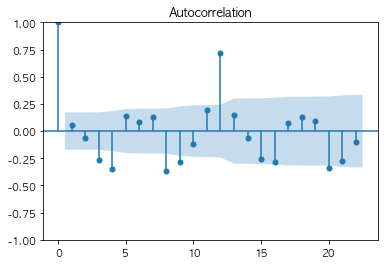

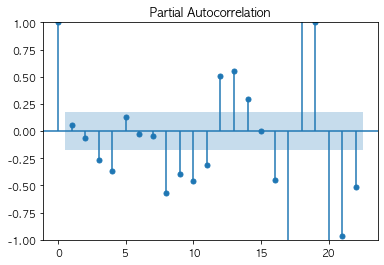

In [6]:
plot_acf(d1tour[1:])
plot_pacf(d1tour[1:])
plt.show()

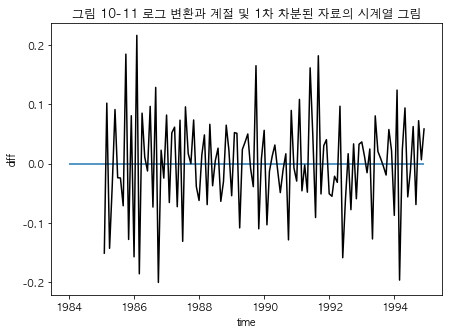

In [7]:
d1_12tour = d1tour.diff(12)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(d1_12tour, 'black')
ax.set_xlabel("time")
ax.set_ylabel("diff")
ax.set_title("그림 10-11 로그 변환과 계절 및 1차 차분된 자료의 시계열 그림")
ax.hlines(0, d1_12tour.index.min(), d1_12tour.index.max())
plt.show()

/Users/jonghyun/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


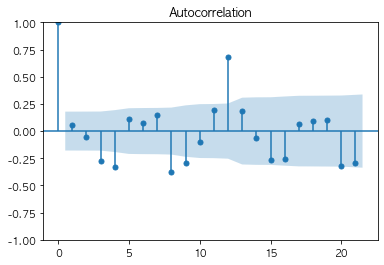

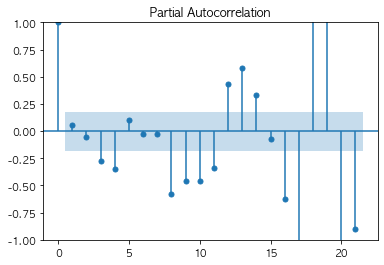

In [8]:
plot_acf(d1tour[12:])
plot_pacf(d1tour[12:])
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.66365D+00    |proj g|=  2.66652D-01

At iterate    5    f=  9.61560D+00    |proj g|=  1.06702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.067D-05   9.616D+00
  F =   9.6155982262041153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


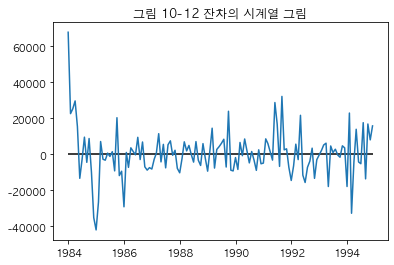

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

fit1 = SARIMAX(data, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit()
resid = fit1.resid

plt.plot(resid)
plt.title("그림 10-12 잔차의 시계열 그림")
plt.hlines(0, resid.index.min(), resid.index.max(), color="black")
plt.show()

/Users/jonghyun/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


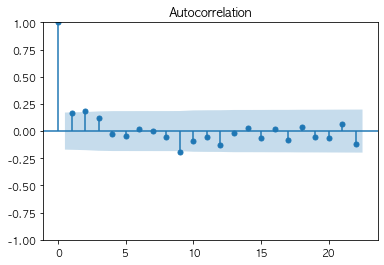

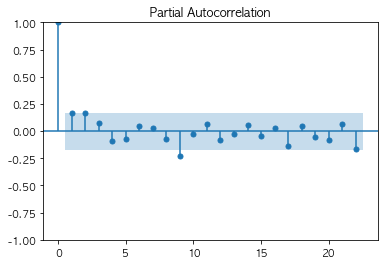

In [19]:
plot_acf(resid)
plot_pacf(resid)
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.68952D+00    |proj g|=  2.30207D-01

At iterate    5    f=  9.62915D+00    |proj g|=  7.88347D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   7.883D-06   9.629D+00
  F =   9.6291513586809909     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


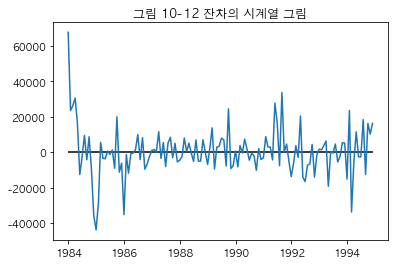

In [20]:
fit2 = SARIMAX(data, order=(0, 1, 1), seasonal_order=(1, 1, 0, 12)).fit()
resid = fit2.resid

plt.plot(resid)
plt.title("그림 10-12 잔차의 시계열 그림")
plt.hlines(0, resid.index.min(), resid.index.max(), color="black")
plt.show()

/Users/jonghyun/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


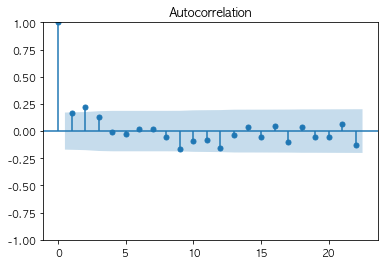

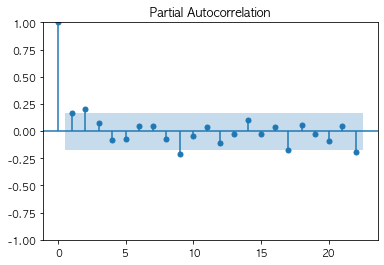

In [21]:
plot_acf(resid)
plot_pacf(resid)
plt.show()